In [366]:
from cProfile import label

import pandas as pd
from tensorflow.python.ops.losses.losses_impl import mean_squared_error
from tensorflow.python.ops.numpy_ops.np_dtypes import object_

df = pd.read_csv("Data/aggregated_spice_price_data_2019_2024.csv")
df

,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2019-10-31,8476.100000,9156.250000,8854.900000
1,2019-11-01,8362.619048,10080.666667,9385.238095
2,2019-11-02,8228.023256,9744.162791,9147.720930
3,2019-11-03,8620.000000,8881.111111,8768.888889
4,2019-11-04,8185.625000,9976.950000,9199.375000
...,...,...,...,...
1822,2024-10-26,9873.513514,11910.000000,11096.297297
1823,2024-10-27,10366.666667,10916.666667,10635.166667
1824,2024-10-28,10333.593750,11987.500000,11361.281250
1825,2024-10-29,9893.684211,11420.263158,10820.263158


In [367]:
df = df[["Price Date", "Modal Price (Rs./Quintal)"]]
# Convert 'Price Date' to datetime format using .loc to avoid the SettingWithCopyWarning
df.loc[:, 'Price Date'] = pd.to_datetime(df['Price Date'])

# Set 'Price Date' as the index
df.set_index('Price Date', inplace=True)

# Get the datatype of the index
index_dtype = df.index.dtype
print(f"Datatype of the index: {index_dtype}")



Datatype of the index: datetime64[ns]


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [368]:
df

,Modal Price (Rs./Quintal)
Price Date,
2019-10-31,8854.900000
2019-11-01,9385.238095
2019-11-02,9147.720930
2019-11-03,8768.888889
2019-11-04,9199.375000
...,...
2024-10-26,11096.297297
2024-10-27,10635.166667
2024-10-28,11361.281250


In [369]:
import seaborn as sns
color_pal = sns.color_palette()

<Axes: title={'center': 'Modal Price'}, xlabel='Price Date'>

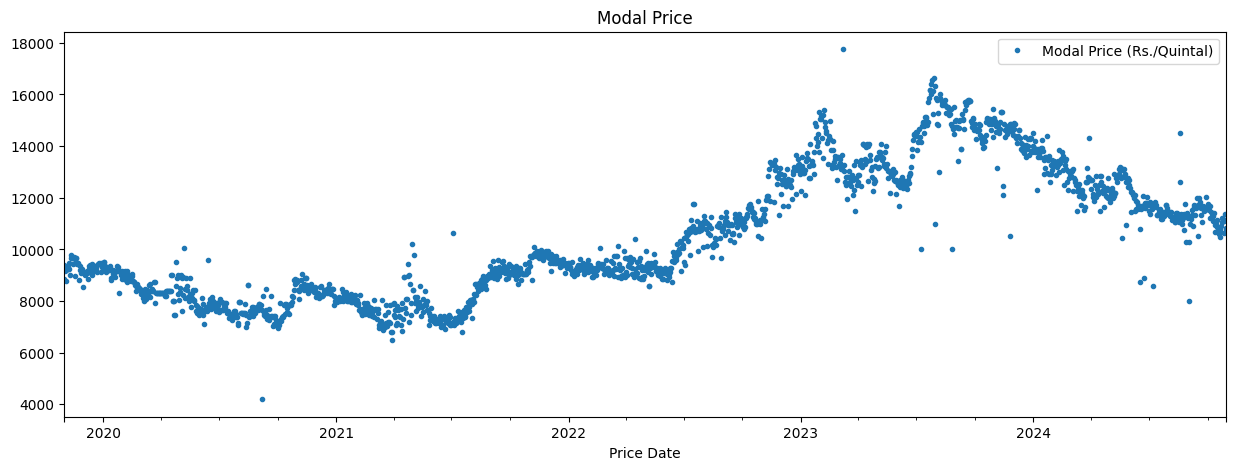

In [370]:
df.plot(style='.', figsize=(15, 5), color=color_pal[0], title="Modal Price", )

# Train/Test Split

In [371]:
train_df = df.iloc[df.index<'05-01-2023']
test_df = df.iloc[df.index>='05-01-2023']

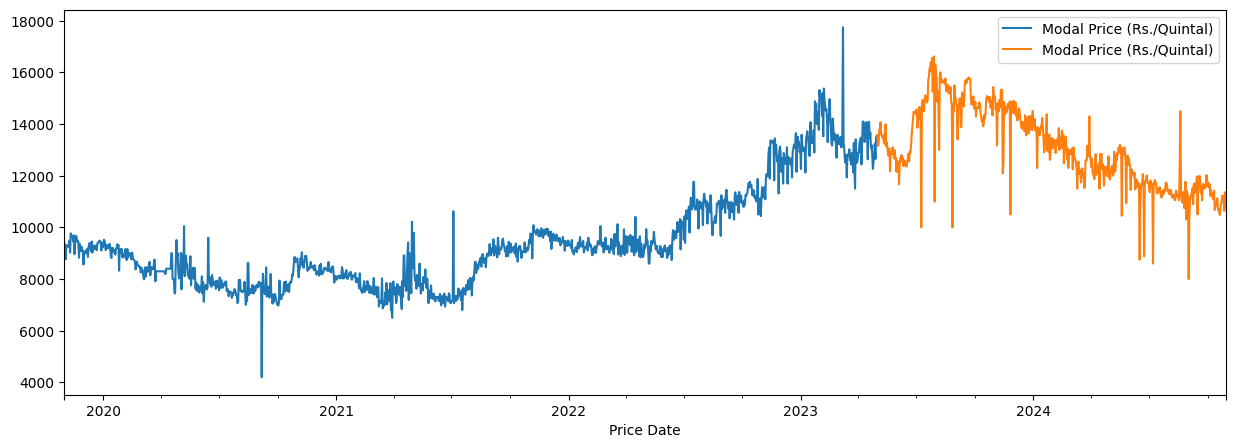

In [372]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
train_df.plot(ax=ax, label='Training set')
test_df.plot(ax=ax, label='Test set')
plt.show()


<Axes: xlabel='Price Date'>

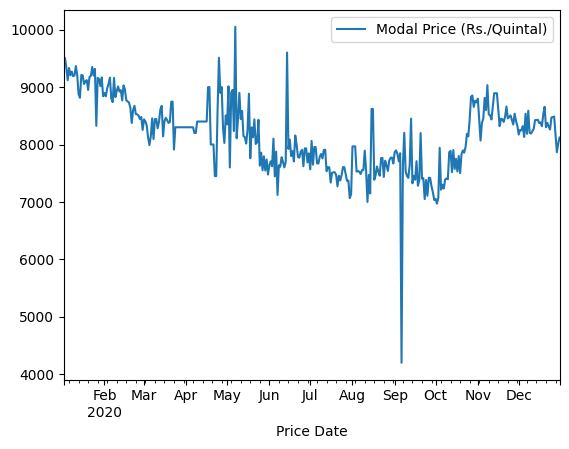

In [373]:
df.iloc[(df.index>'01-01-2020') & (df.index<'01-01-2021')].plot()

# Feature Creation

In [374]:
def create_features(df):
    """
    Create time series feature based on time series index
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df
    

In [375]:
df = create_features(df)
df

,Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear
Price Date,,,,,,
2019-10-31,8854.900000,3,4,10,2019,304
2019-11-01,9385.238095,4,4,11,2019,305
2019-11-02,9147.720930,5,4,11,2019,306
2019-11-03,8768.888889,6,4,11,2019,307
2019-11-04,9199.375000,0,4,11,2019,308
...,...,...,...,...,...,...
2024-10-26,11096.297297,5,4,10,2024,300
2024-10-27,10635.166667,6,4,10,2024,301
2024-10-28,11361.281250,0,4,10,2024,302


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_66269/2503312806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dayofweek", y="Modal Price (Rs./Quintal)", palette='Reds')


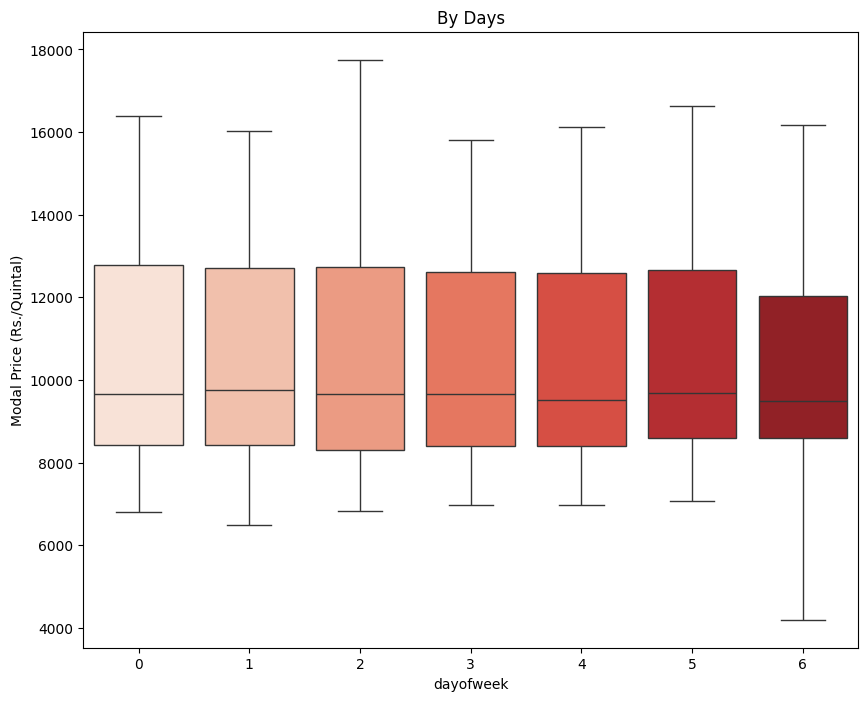

In [376]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="dayofweek", y="Modal Price (Rs./Quintal)", palette='Reds')
ax.set_title("By Days")
plt.show()

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_66269/3004129324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="month", y="Modal Price (Rs./Quintal)", palette='Blues')


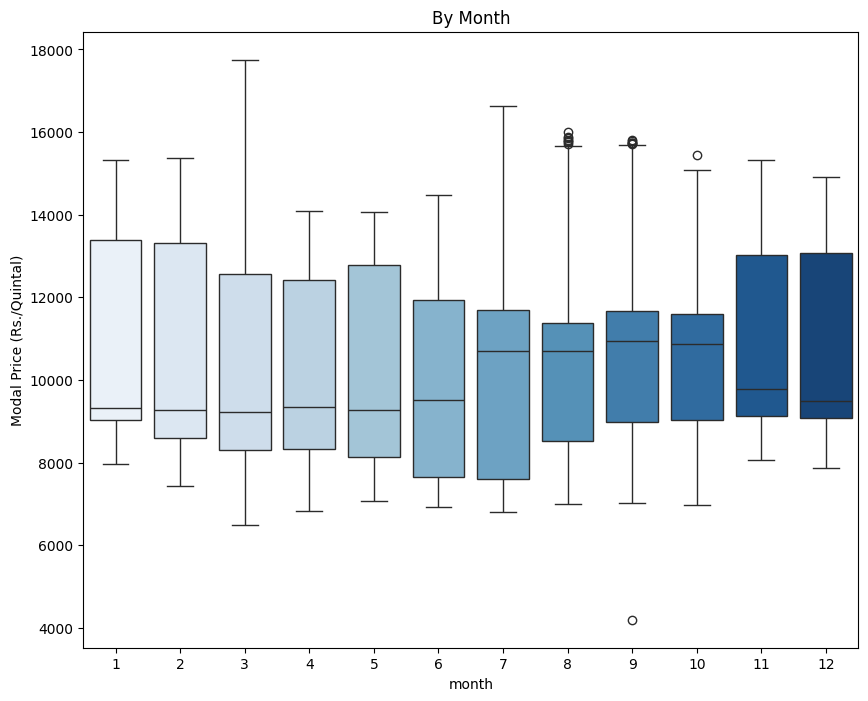

In [377]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="month", y="Modal Price (Rs./Quintal)", palette='Blues')
ax.set_title("By Month")
plt.show()

In [378]:
from sklearn.metrics import mean_absolute_error

# Create our Model

In [379]:
train = create_features(train_df)
test = create_features(test_df)

In [380]:
df.columns

Index(['Modal Price (Rs./Quintal)', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [381]:
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'Modal Price (Rs./Quintal)'

In [382]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [383]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# 
# # Define a simplified parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],       # Number of trees
#     'learning_rate': [0.01, 0.05, 0.1],    # Step size
#     'max_depth': [3, 5, 7],                # Tree depth
#     'subsample': [0.8, 1.0],               # Row sampling ratio
#     'colsample_bytree': [0.8, 1.0],        # Feature sampling ratio
# }
# 
# # Initialize the XGBRegressor
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', early_stopping_rounds=50)
# 
# # Use GridSearchCV with cross-validation
# grid_search = GridSearchCV(
#     estimator=xgb_reg,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=3,  # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1  # Use all available cores
# )
# 
# # Fit the grid search model
# grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)
# 
# # Assign the best model to `reg`
# reg = grid_search.best_estimator_
# 
# # Display the best parameters
# print("Best Parameters:", grid_search.best_params_)


# Feature Importance

In [384]:
# fi = pd.DataFrame(data=reg.feature_importances_,
#              index=reg.feature_names_in_,
#              columns=['Importance'])

# Forecast on Test

In [385]:
# test['prediction'] = reg.predict(X_test)

In [386]:
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

In [387]:
# ax = df[[TARGET]].plot(figsize=(15, 5))
# df['prediction'].plot(ax = ax)
# ax.set_title('Raw Data and Prediction')
# plt.show()

In [388]:
# import numpy as np
# np.sqrt(mean_absolute_error(test[TARGET], test['prediction']))

# Outlier Analysis

In [389]:
# df['Modal Price (Rs./Quintal)'].plot(kind='hist', bins=500)

In [390]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Create a boxplot for 'Modal Price (Rs./Quintal)'
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='Modal Price (Rs./Quintal)', color='skyblue')
# 
# # Adding labels and title
# plt.xlabel('Modal Price (Rs./Quintal)')
# plt.title('Boxplot of Modal Price (Rs./Quintal)')
# 
# # Show the plot
# plt.tight_layout()
# plt.show()

## Cross Validation

In [391]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=180*1, gap=1)
df = df.sort_index()

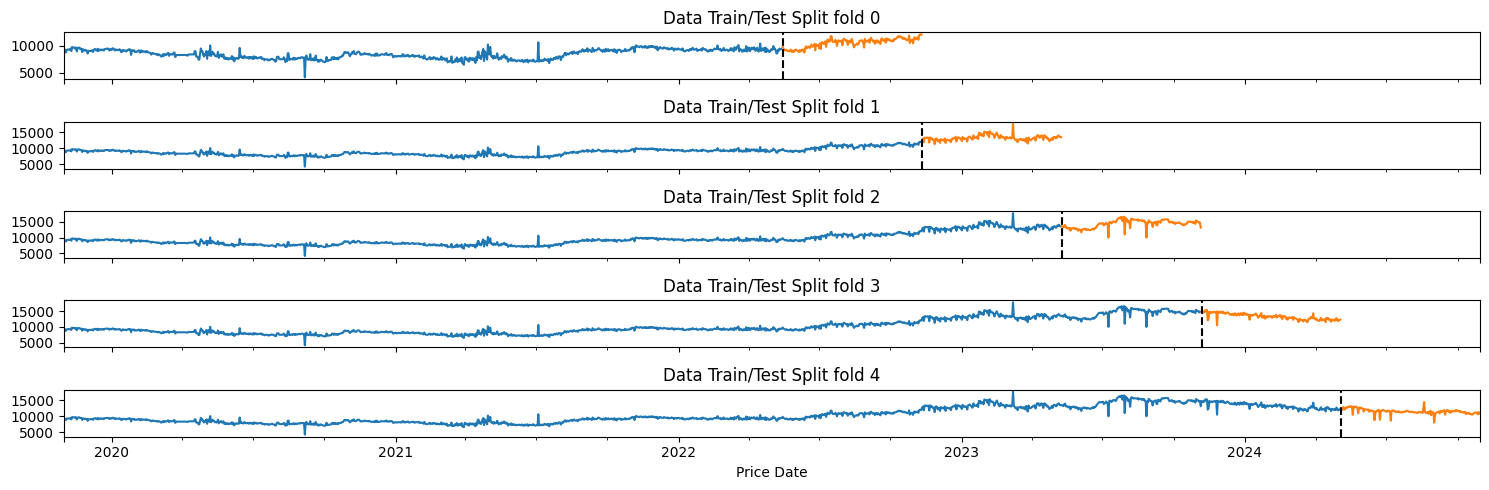

In [392]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(15, 5), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    # Plot training data
    train["Modal Price (Rs./Quintal)"].plot(ax=axs[fold], label='Train', title=f"Data Train/Test Split fold {fold}")

    # Plot test data
    test["Modal Price (Rs./Quintal)"].plot(ax=axs[fold], label='Test')

    # Add vertical line to indicate the split point
    axs[fold].axvline(test.index.min(), color='black', linestyle='--')

    fold += 1

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


# Forecasting Horizon

In [393]:
df = create_features(df)

### Lag features

In [394]:
target_map = df['Modal Price (Rs./Quintal)'].to_dict()

In [395]:
def add_lags(df):
    df = df.copy()
    df['lag1'] = (df.index - pd.Timedelta('175 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('350 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('525 days')).map(target_map)
    return df

In [396]:
df = add_lags(df)
df

,Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,lag1,lag2,lag3
Price Date,,,,,,,,,
2019-10-31,8854.900000,3,4,10,2019,304,NaN,NaN,NaN
2019-11-01,9385.238095,4,4,11,2019,305,NaN,NaN,NaN
2019-11-02,9147.720930,5,4,11,2019,306,NaN,NaN,NaN
2019-11-03,8768.888889,6,4,11,2019,307,NaN,NaN,NaN
2019-11-04,9199.375000,0,4,11,2019,308,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,5,4,10,2024,300,12386.411765,15324.5,13054.590909
2024-10-27,10635.166667,6,4,10,2024,301,12000.000000,15324.5,12170.000000
2024-10-28,11361.281250,0,4,10,2024,302,12059.689655,15324.5,12925.952381


In [397]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
    'gamma': [0, 0.1, 0.2, 0.3]  # Adjust values of gamma as needed
}

# Initialize lists to store predictions and scores for each fold
preds = []
scores = []
fold = 0

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5)

# Loop over each fold of TimeSeriesSplit
for train_idx, val_idx in tss.split(df):
    # Split data into train and test for each fold
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    # Feature engineering steps
    train = create_features(train)
    test = create_features(test)
    train = add_lags(train)
    test = add_lags(test)

    # Define features and target
    FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'lag1', 'lag2', 'lag3']
    TARGET = 'Modal Price (Rs./Quintal)'
    X_train = train[FEATURES]
    y_train = train[TARGET]
    X_test = test[FEATURES]
    y_test = test[TARGET]

    # Initialize GridSearchCV without cross-validation (cv=None)
    grid_search = GridSearchCV(
        estimator=xgb.XGBRegressor(objective='reg:squarederror'),
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=None,  # No cross-validation within GridSearchCV
        verbose=1,
        n_jobs=-1
    )

    # Fit the model using GridSearchCV on training data only
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    reg = grid_search.best_estimator_

    # Predict on the test set
    y_pred = reg.predict(X_test)
    preds.append(y_pred)

    # Calculate RMSE and store it
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

    print(f"Best Hyperparameters for fold {fold}: {grid_search.best_params_}")
    fold += 1

# Optionally, print the scores for each fold
print(f"Scores for each fold: {scores}")
print(f"Average RMSE: {np.mean(scores)}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for fold 0: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for fold 1: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for fold 2: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for fold 3: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for fold 4: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Scores for each fold: [np.float64(592.782776149848), np.float64(1328.7757034549581), np.float64(2827.2147156672886), np.float64(2923.548474267648), np.floa

In [398]:
# scores

# Predicting the Future

In [399]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Import the necessary function
df = create_features(df)
df = add_lags(df)
df_vis = df.copy()
df = df.iloc[df.index<'2024-10-31']
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'lag1', 'lag2', 'lag3']
TARGET = 'Modal Price (Rs./Quintal)'

X_all = df[FEATURES]
y_all = df[TARGET]
reg = xgb.XGBRegressor(gamma= 0.2, learning_rate= 0.01, max_depth= 7, n_estimators= 1000)

reg.fit(X_all, y_all, eval_set=[(X_all, y_all), (X_all, y_all)],verbose=100)

[0]	validation_0-rmse:2423.87015	validation_1-rmse:2423.87015
[100]	validation_0-rmse:985.80095	validation_1-rmse:985.80095
[200]	validation_0-rmse:471.86312	validation_1-rmse:471.86312
[300]	validation_0-rmse:300.57552	validation_1-rmse:300.57552
[400]	validation_0-rmse:244.66243	validation_1-rmse:244.66243
[500]	validation_0-rmse:216.47447	validation_1-rmse:216.47447
[600]	validation_0-rmse:196.30992	validation_1-rmse:196.30992
[700]	validation_0-rmse:179.29035	validation_1-rmse:179.29035
[800]	validation_0-rmse:168.01739	validation_1-rmse:168.01739
[900]	validation_0-rmse:156.53184	validation_1-rmse:156.53184
[999]	validation_0-rmse:148.16834	validation_1-rmse:148.16834


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [400]:
df.index.max()

Timestamp('2024-10-30 00:00:00')

In [401]:
#Create future dataframe
future = pd.date_range('2024-10-31', '2025-04-01', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [402]:
future_w_features = df_and_future.query('isFuture').copy()

In [403]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

<Axes: title={'center': 'Future Predictions'}>

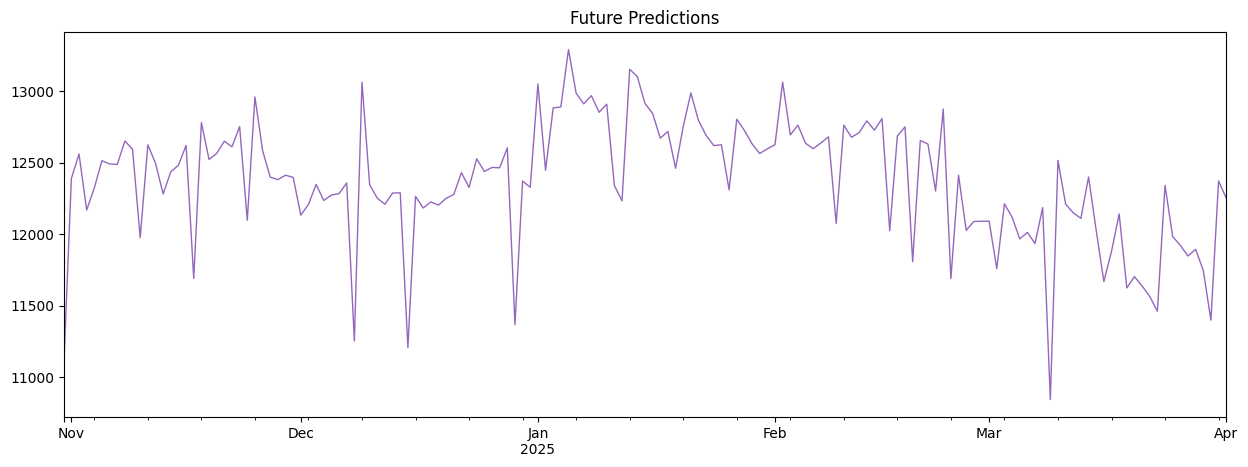

In [404]:
future_w_features['pred'].plot(figsize=(15, 5), color=color_pal[4], ms=1, lw=1, title='Future Predictions')

<Axes: title={'center': 'Future Predictions'}>

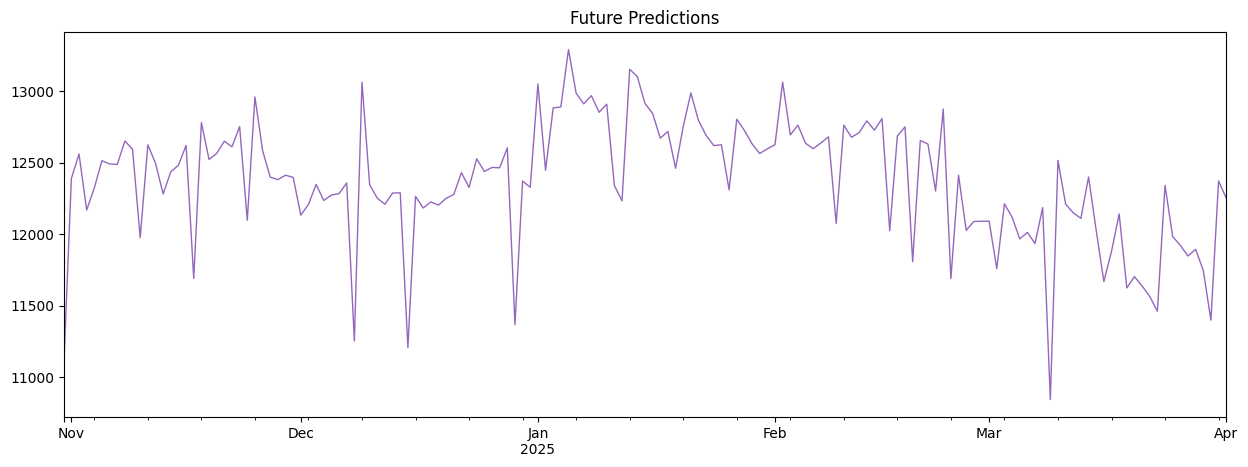

In [405]:
future_w_features['pred'].plot(figsize=(15, 5), color=color_pal[4], ms=1, lw=1, title='Future Predictions')

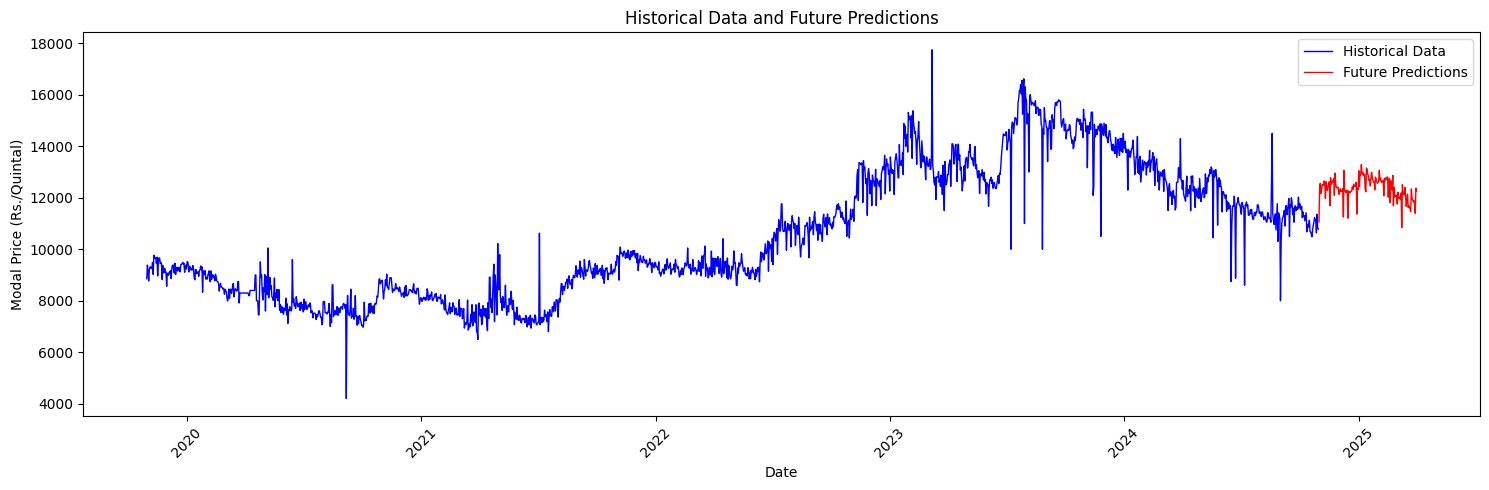

In [406]:
import matplotlib.pyplot as plt

# Plot historical data (df) and future predictions (future_w_features)
plt.figure(figsize=(15, 5))

# Plot the historical data using the index (Price Date)
plt.plot(df_vis.index, df_vis['Modal Price (Rs./Quintal)'], label='Historical Data', color='blue', lw=1)

# Plot the future predictions using the index of future_w_features
plt.plot(future_w_features.index, future_w_features['pred'], label='Future Predictions', color='red', lw=1)

# Add title and labels
plt.title('Historical Data and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
